Weather Data Analysis for 2022-01-01 to 2022-12-31
Total records: 365

Summary Statistics:
       MaxTemp  MinTemp  AvgTemp  Rainfall  Humidity  WindSpeed
count   365.00   365.00   365.00    365.00    365.00     365.00
mean     25.01    15.01    20.00      7.50     60.23       7.02
std      10.68    10.68    10.62      8.03     15.22       2.44
min       6.59    -3.41     5.00      0.05     30.11       3.14
25%      14.48     4.48     9.42      2.00     47.04       5.17
50%      24.68    14.68    20.00      4.83     58.85       6.86
75%      35.46    25.46    30.58     10.71     74.10       8.40
max      43.56    33.56    35.00     52.46     89.35      17.93


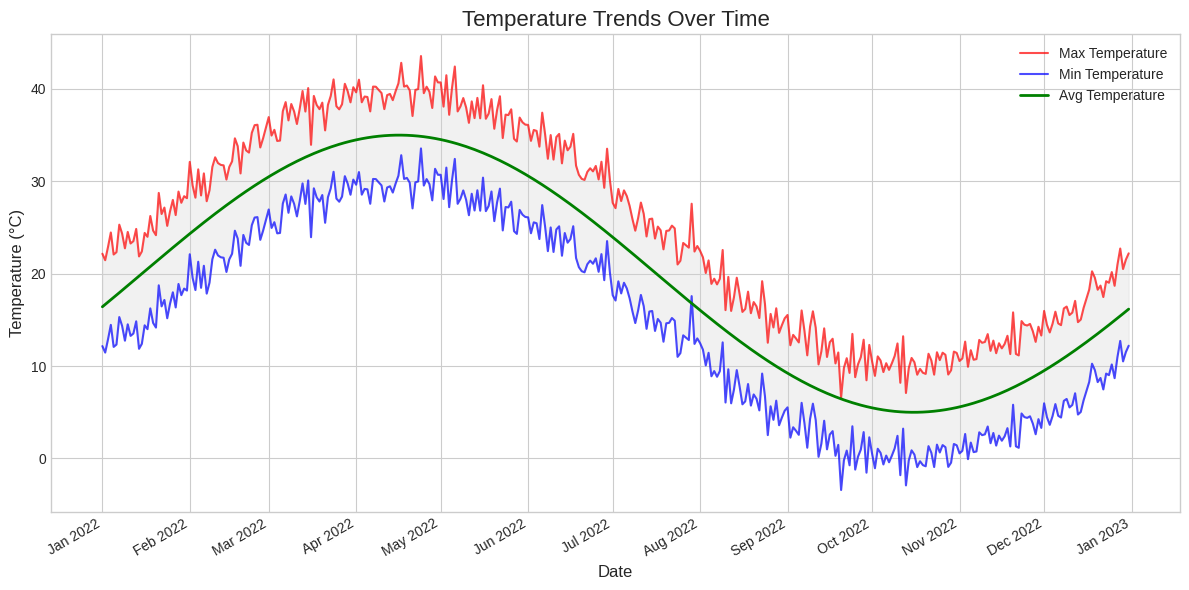

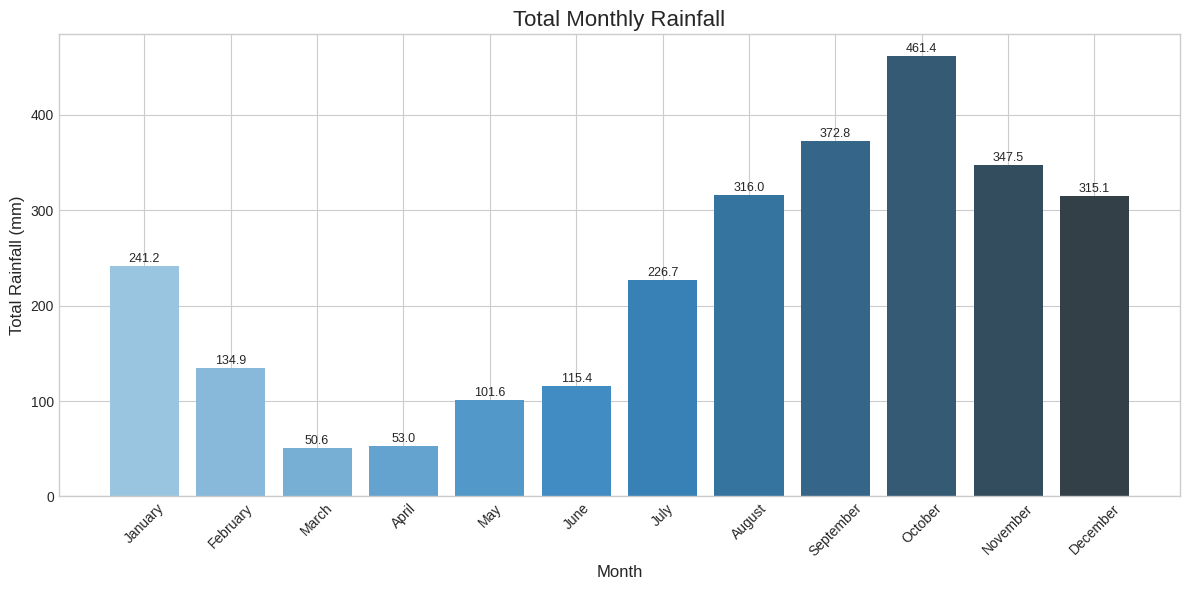

<ipython-input-3-97e3c21bc893>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='AvgTemp', data=data, ax=axs[0, 0],
<ipython-input-3-97e3c21bc893>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Rainfall', data=data, ax=axs[0, 1],
<ipython-input-3-97e3c21bc893>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Humidity', data=data, ax=axs[1, 0],
<ipython-input-3-97e3c21bc893>:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

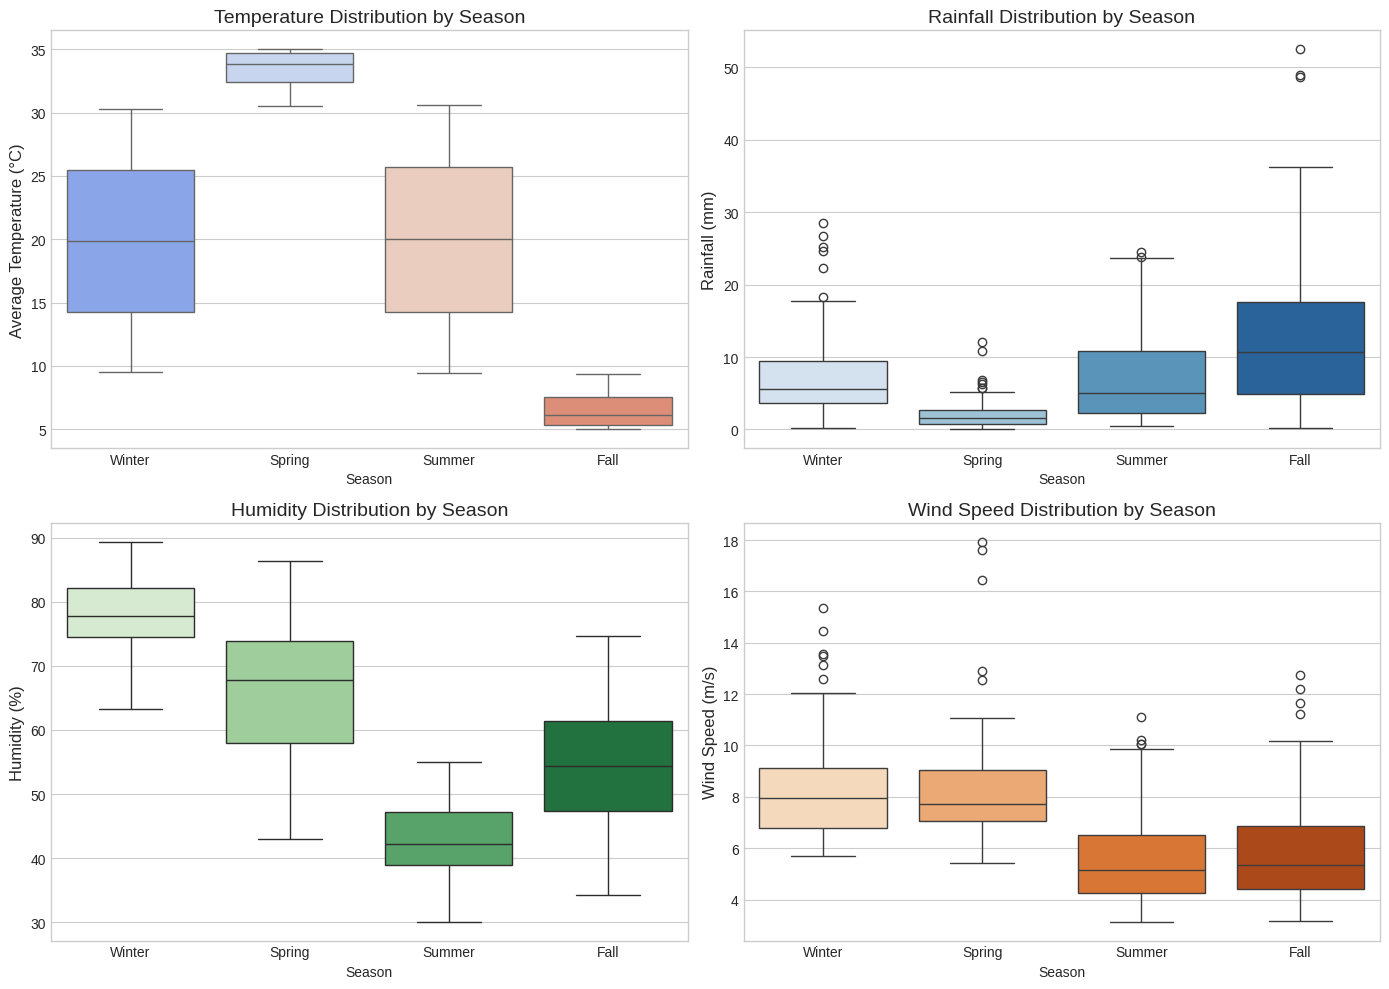

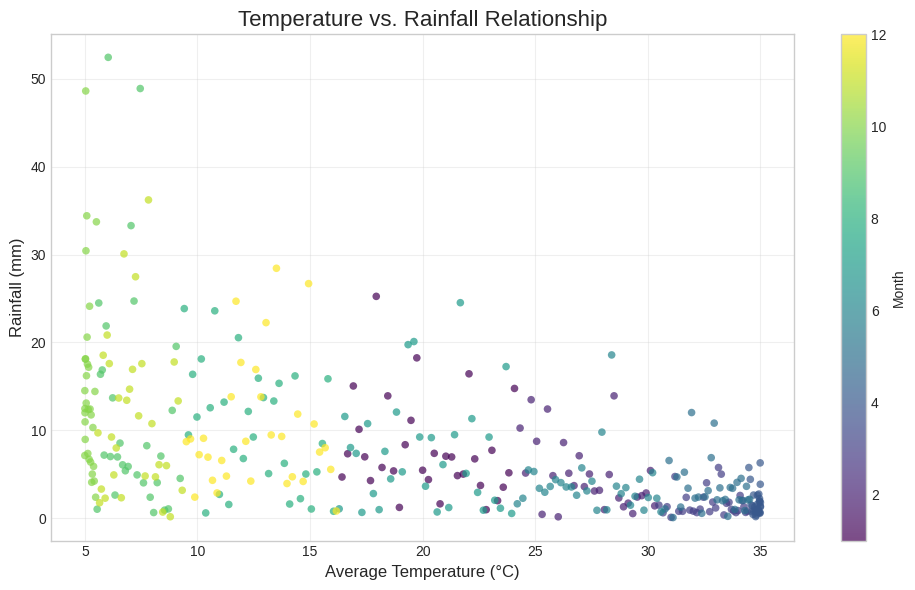

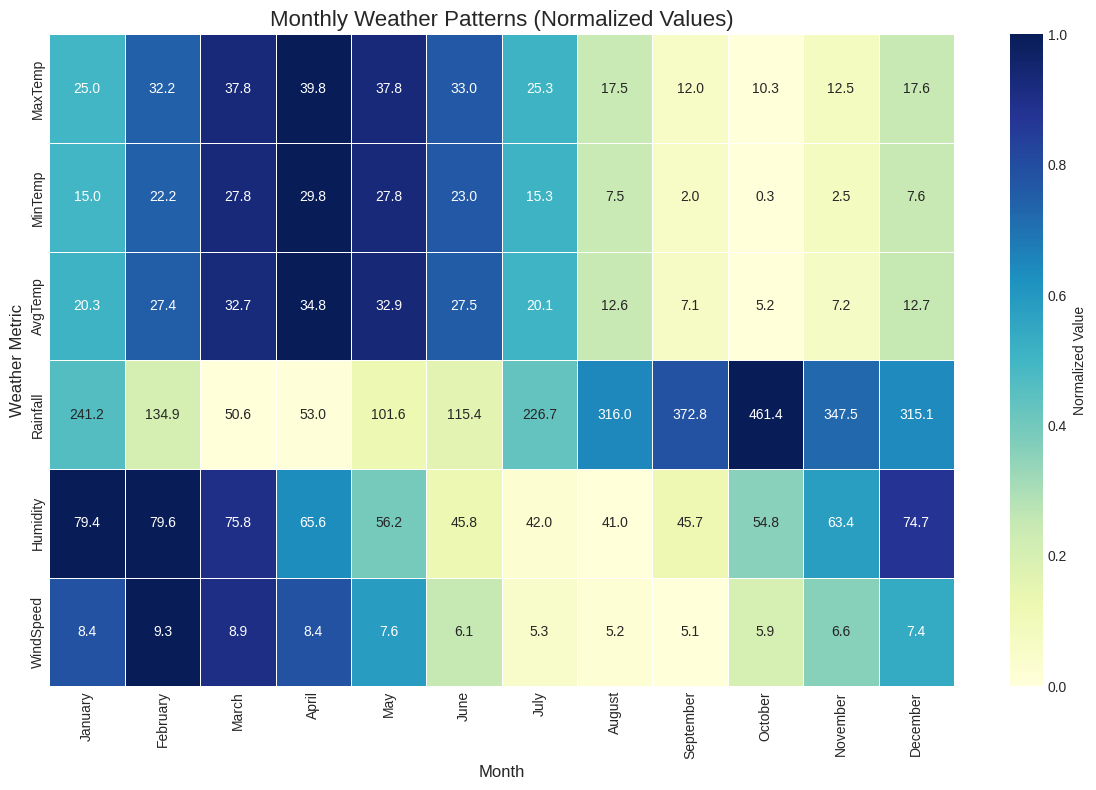


Seasonal Averages:
        MaxTemp  MinTemp  AvgTemp  Rainfall  Humidity  WindSpeed
Season                                                          
Fall      11.59     1.59     6.49   1181.71     54.64       5.88
Spring    38.45    28.45    33.48    205.18     65.84       8.32
Summer    25.18    15.18    20.00    658.22     42.90       5.53
Winter    24.68    14.68    19.88    691.18     77.86       8.35

Weather data saved to 'weather_data.csv'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

def generate_weather_data(start_date='2022-01-01', periods=365):
    np.random.seed(42)

    dates = pd.date_range(start=start_date, periods=periods)

    avg_temps = 20 + 15 * np.sin((dates.dayofyear - 15) * 2 * np.pi / 365)
    temp_noise = np.random.normal(0, 3, len(dates))
    max_temps = avg_temps + 5 + temp_noise/2
    min_temps = avg_temps - 5 + temp_noise/2

    avg_rainfall = 5 - 4 * np.sin((dates.dayofyear - 15) * 2 * np.pi / 365)
    rainfall = np.maximum(0, np.random.gamma(shape=1.5, scale=avg_rainfall, size=len(dates)))

    humidity = 60 + 20 * np.sin((dates.dayofyear + 60) * 2 * np.pi / 365) + np.random.normal(0, 5, len(dates))
    humidity = np.clip(humidity, 0, 100)

    wind_speed = 5 + 2 * np.sin((dates.dayofyear + 30) * 2 * np.pi / 365) + np.random.exponential(2, len(dates))

    weather_df = pd.DataFrame({
        'Date': dates,
        'MaxTemp': max_temps,
        'MinTemp': min_temps,
        'AvgTemp': avg_temps,
        'Rainfall': rainfall,
        'Humidity': humidity,
        'WindSpeed': wind_speed
    })

    weather_df['Month'] = weather_df['Date'].dt.month_name()

    def get_season(date):
        month = date.month
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    weather_df['Season'] = weather_df['Date'].apply(get_season)

    return weather_df

weather_data = generate_weather_data()

def plot_temperature_trends(data):
    plt.figure(figsize=(12, 6))

    plt.plot(data['Date'], data['MaxTemp'], color='red', alpha=0.7, label='Max Temperature')
    plt.plot(data['Date'], data['MinTemp'], color='blue', alpha=0.7, label='Min Temperature')
    plt.plot(data['Date'], data['AvgTemp'], color='green', linewidth=2, label='Avg Temperature')

    plt.fill_between(data['Date'], data['MinTemp'], data['MaxTemp'], color='lightgrey', alpha=0.3)

    plt.title('Temperature Trends Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Temperature (°C)', fontsize=12)
    plt.legend()

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.savefig('temperature_trends.png', dpi=300)
    plt.show()

def plot_rainfall_distribution(data):
    monthly_rainfall = data.groupby('Month')['Rainfall'].sum().reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])

    plt.figure(figsize=(12, 6))

    bars = plt.bar(monthly_rainfall.index, monthly_rainfall.values, color=sns.color_palette("Blues_d", len(monthly_rainfall)))

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.1f}',
                 ha='center', va='bottom', rotation=0, fontsize=9)

    plt.title('Total Monthly Rainfall', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Rainfall (mm)', fontsize=12)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('monthly_rainfall.png', dpi=300)
    plt.show()

def plot_seasonal_patterns(data):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    sns.boxplot(x='Season', y='AvgTemp', data=data, ax=axs[0, 0],
                order=['Winter', 'Spring', 'Summer', 'Fall'],
                palette='coolwarm')
    axs[0, 0].set_title('Temperature Distribution by Season', fontsize=14)
    axs[0, 0].set_ylabel('Average Temperature (°C)', fontsize=12)

    sns.boxplot(x='Season', y='Rainfall', data=data, ax=axs[0, 1],
                order=['Winter', 'Spring', 'Summer', 'Fall'],
                palette='Blues')
    axs[0, 1].set_title('Rainfall Distribution by Season', fontsize=14)
    axs[0, 1].set_ylabel('Rainfall (mm)', fontsize=12)

    sns.boxplot(x='Season', y='Humidity', data=data, ax=axs[1, 0],
                order=['Winter', 'Spring', 'Summer', 'Fall'],
                palette='Greens')
    axs[1, 0].set_title('Humidity Distribution by Season', fontsize=14)
    axs[1, 0].set_ylabel('Humidity (%)', fontsize=12)

    sns.boxplot(x='Season', y='WindSpeed', data=data, ax=axs[1, 1],
                order=['Winter', 'Spring', 'Summer', 'Fall'],
                palette='Oranges')
    axs[1, 1].set_title('Wind Speed Distribution by Season', fontsize=14)
    axs[1, 1].set_ylabel('Wind Speed (m/s)', fontsize=12)

    plt.tight_layout()
    plt.savefig('seasonal_patterns.png', dpi=300)
    plt.show()

def plot_temp_rainfall_relationship(data):
    plt.figure(figsize=(10, 6))

    month_nums = data['Date'].dt.month

    scatter = plt.scatter(data['AvgTemp'], data['Rainfall'],
              c=month_nums, cmap='viridis',
              alpha=0.7, s=30, edgecolors='none')

    plt.colorbar(scatter, label='Month')

    plt.title('Temperature vs. Rainfall Relationship', fontsize=16)
    plt.xlabel('Average Temperature (°C)', fontsize=12)
    plt.ylabel('Rainfall (mm)', fontsize=12)

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('temp_rainfall_relation.png', dpi=300)
    plt.show()

def plot_monthly_heatmap(data):
    monthly_data = data.groupby('Month').agg({
        'MaxTemp': 'mean',
        'MinTemp': 'mean',
        'AvgTemp': 'mean',
        'Rainfall': 'sum',
        'Humidity': 'mean',
        'WindSpeed': 'mean'
    }).reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])

    normalized_data = monthly_data.copy()
    for column in normalized_data.columns:
        normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / \
                                 (normalized_data[column].max() - normalized_data[column].min())

    plt.figure(figsize=(12, 8))
    sns.heatmap(normalized_data.T, annot=monthly_data.T.round(1), fmt='.1f',
                cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Normalized Value'})

    plt.title('Monthly Weather Patterns (Normalized Values)', fontsize=16)
    plt.ylabel('Weather Metric', fontsize=12)
    plt.xlabel('Month', fontsize=12)

    plt.tight_layout()
    plt.savefig('monthly_weather_heatmap.png', dpi=300)
    plt.show()

def visualize_weather_data(data):
    print(f"Weather Data Analysis for {data['Date'].min().strftime('%Y-%m-%d')} to {data['Date'].max().strftime('%Y-%m-%d')}")
    print(f"Total records: {len(data)}")

    print("\nSummary Statistics:")
    print(data[['MaxTemp', 'MinTemp', 'AvgTemp', 'Rainfall', 'Humidity', 'WindSpeed']].describe().round(2))

    plot_temperature_trends(data)
    plot_rainfall_distribution(data)
    plot_seasonal_patterns(data)
    plot_temp_rainfall_relationship(data)
    plot_monthly_heatmap(data)

    seasonal_avg = data.groupby('Season').agg({
        'MaxTemp': 'mean',
        'MinTemp': 'mean',
        'AvgTemp': 'mean',
        'Rainfall': 'sum',
        'Humidity': 'mean',
        'WindSpeed': 'mean'
    }).round(2)

    print("\nSeasonal Averages:")
    print(seasonal_avg)

visualize_weather_data(weather_data)

weather_data.to_csv('weather_data.csv', index=False)
print("\nWeather data saved to 'weather_data.csv'")